<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

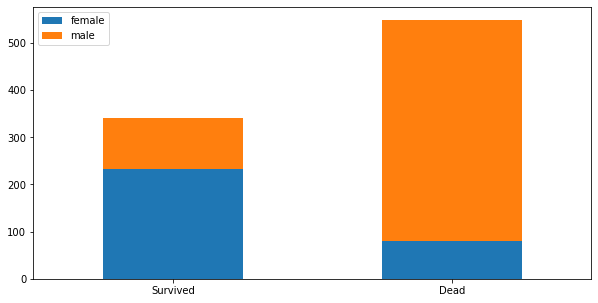

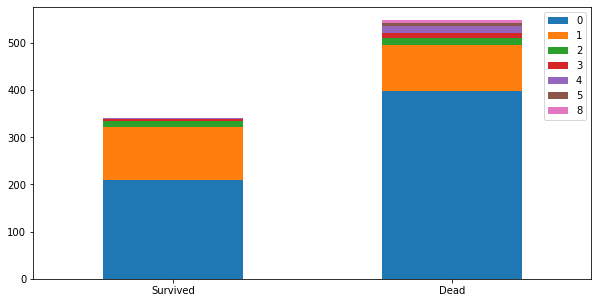

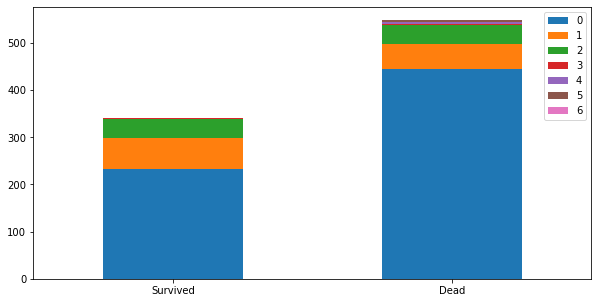

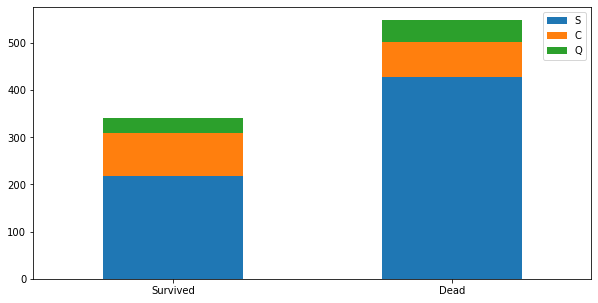

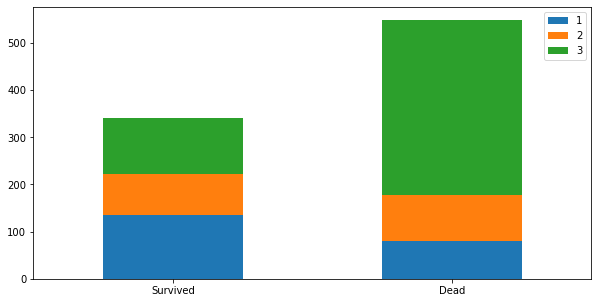

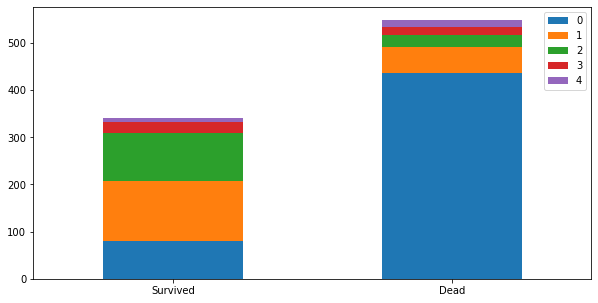

In [272]:
import pandas as pd 
train = pd.read_csv("../titanic/train.csv")
test = pd.read_csv("../titanic/test.csv")

# EDA
train.head()
train.shape # 891, 12
train.info()
test.shape #418, 11
test.info()
train.isnull().sum()
test.isnull().sum()

# EDA - 시각화
import matplotlib.pyplot as plt 
import seaborn as sns
# 함수로 [ 범주형 -> bar chart ] 만들기
def barChart(data,f):
    survived = data[data['Survived']==1][f].value_counts() # 생존자 (f별로 구분)
    dead = data[data['Survived']==0][f].value_counts() # 사망자 (f별로 구분)
    df = pd.DataFrame([survived, dead]) # 데이터프레임으로 합치기
    df.index = ['Survived', 'Dead'] # 인덱스 바꿔주기
    df.plot(kind='bar', figsize=(10, 5), stacked=True) # 플롯그리기 / 옵션없애줘도 됨
    plt.xticks(rotation = 0) # x라벨 가로로 나오게 돌려주기

#train[train['Survived']==1] = 생존자만 출력 
#[f] 컬럼 = 아래의 'Sex' 즉 성별만 나오게 됨. 
#.value_counts() = 각각 성별의  인원수만 나옴 
#df=pd.DataFrame([survived, dead]) 각각 나온 생존자와 사망자를 df에 담음
#index명을 주어줌. 안주어주면 Sex로만 두개로 출력 
#stacked=Faslse 가 default, stacked=True하면 위아래로 쌓아짐
barChart(train,'Sex')
barChart(train,'SibSp')
barChart(train,'Parch')
barChart(train,'Embarked')
barChart(train,'Pclass')

"""
특성공학: 머신러닝을 위한 데이터 전처리
"""
# 2개의 데이터 프레임을 리스트로 묶기
train_test=[train, test] # 리스트 크기:2
train_test[0] # train data
train_test[1] # test data
# d는 2번 반복되어 진다.

# 성별 컬럼을 숫자로 매핑
tm = {"male":0, "female":1}
for data in train_test:
    data['Sex'] = data['Sex'].map(tm)

# Name 컬럼에서 호칭 꺼내기 (정규표현식)
for d in train_test:
    d['Title']=d['Name'].str.extract("([A-Za-z]+)\.")
    # ([A-Za-z]+)\. : 공백 다음에 영문자 1글자 이상, 마지막글자는 점(.)으로 끝나야 함 / 소괄호는(그룹)

train['Title'].value_counts()
test['Title'].value_counts()
train['Name']

# 호칭 꺼냈으니까 Name 컬럼 삭제
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

# 호칭 컬럼을 숫자로 매핑
tm = {'Mr':0,'Miss':1,'Mrs':2,'Master':3,'Dr':4,'Rev':4,'Col':4,'Mlle':4,'Major':4,'Lady':2,'Capt':4,'Ms':2,'Jonkheer':4,'Don':4, 'Dona':4, 'Mme':4,'Countess':2,'Sir':4}
for data in train_test:
    data['TitleNum'] = data['Title'].map(tm)
train['TitleNum'].value_counts()
barChart(train,'TitleNum')

# 호칭 컬럼별 중앙값으로 Age 결측값처리
train['Age'].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test['Age'].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)

# Age 컬럼 매핑
# for data in train_test:
#     data.loc[data['Age']<=13,'Age']=0
#     data.loc[(data['Age']>13)&(data['Age']<=26),'Age']=1
#     data.loc[(data['Age']>26)&(data['Age']<=36),'Age']=2
#     data.loc[(data['Age']>36)&(data['Age']<=62),'Age']=3
#     data.loc[data['Age']>62,'Age']=4
# barChart(train,'Age')

# Embarked 컬럼 매핑 (S:0, C:1, Q:2)
tm = {"S":0,"C":1,"Q":2}
for data in train_test:
    data["Embarked"]=data["Embarked"].map(tm)

# Embarked 컬럼 매핑 (다른방법)
# for data in train_test:
#     data.Embarked.astype('category').cat.codes

In [273]:
# 결측값 확인
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    float64
 11  Title        891 non-null    object 
 12  TitleNum     891 non-null    int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 90.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenge

#AGE제외한 결측컬럼 
# #train : Cabin, Embarked 
# #test : Cabin, Fare

In [274]:
# test 데이터 Fare 결측값 (1개) 처리
# Fare 결측값 확인
# test[test['Fare'].isnull()]
test[['Age','Fare']].info()
test['Fare'] = test['Fare'].fillna(test[(test['Pclass']==3) & (test['Embarked']==0) & (test['Age']>40.0)].Fare.mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     418 non-null    float64
 1   Fare    417 non-null    float64
dtypes: float64(2)
memory usage: 6.7 KB


In [275]:
# Fare로 추정하여 승선도시값을 채우세요 (Embarked)

# Embarked 결측값처리 예시
train['Embarked'] = train['Embarked'].fillna(0)

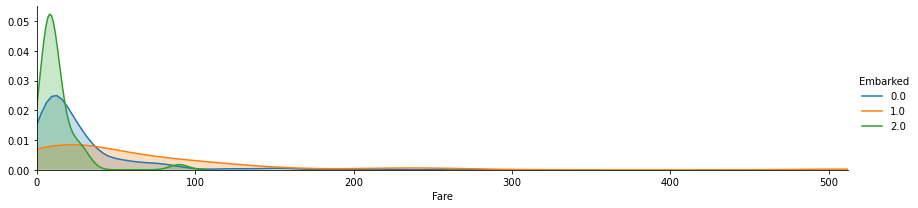

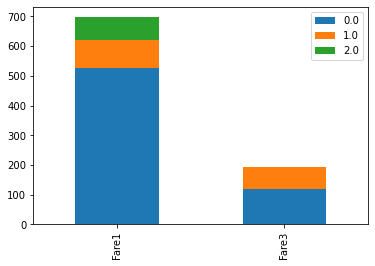

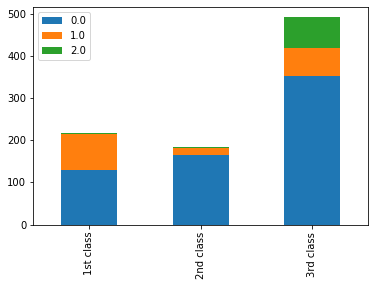

In [276]:
# Fare로 추정하여 승선도시값을 채우세요 (Embarked)

# Embarked 결측값처리 예시
train['Embarked'] = train['Embarked'].fillna(0)

# 시각화 / facetgrid : 다중플랏 그리드를 구성(도화지를 나눔)
facet = sns.FacetGrid(train, hue='Embarked',aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0,train['Fare'].max()))
#plt.xlim(15,50)
facet.add_legend()

# Fare별 Embarked 시각화 (Embarked 결측값 처리 위해서)
Fare1 = train[train['Fare']<=36].Embarked.value_counts()
# Fare2 = train[(train['Fare']>18)&(train['Fare']<=36)].Embarked.value_counts()
Fare3 = train[train['Fare']>36].Embarked.value_counts()

Pclassdata = pd.DataFrame([Fare1,Fare3])
Pclassdata.index = ['Fare1','Fare3']
Pclassdata.plot(kind='bar', stacked=True)

# Fare <=36 이면 Embarked 2 에서 탔다.

# Pclass별 Embarked 시각화 (Embarked 결측값 처리 위해서)(S:0, C:1, Q:2)
Pclass1 = train[train["Pclass"]==1]["Embarked"].value_counts()
Pclass2 = train[train["Pclass"]==2]["Embarked"].value_counts()
Pclass3 = train[train["Pclass"]==3]["Embarked"].value_counts()

Pclassdata = pd.DataFrame([Pclass1,Pclass2,Pclass3])
Pclassdata.index = ['1st class','2nd class','3rd class']
Pclassdata.plot(kind='bar', stacked=True)

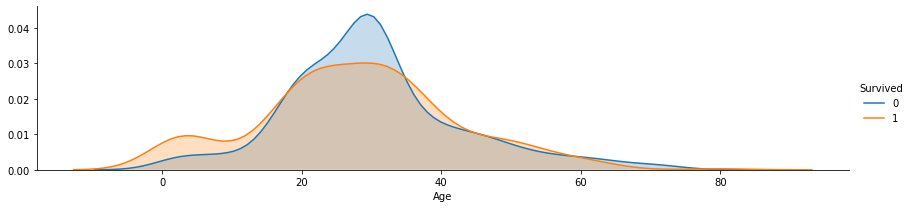

In [277]:
# 연령별 생존/사망자 플롯
# facetgrid : 다중플랏 그리드를 구성(도화지를 나눔)
facet = sns.FacetGrid(train, hue='Survived',aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.add_legend()

(30.0, 40.0)

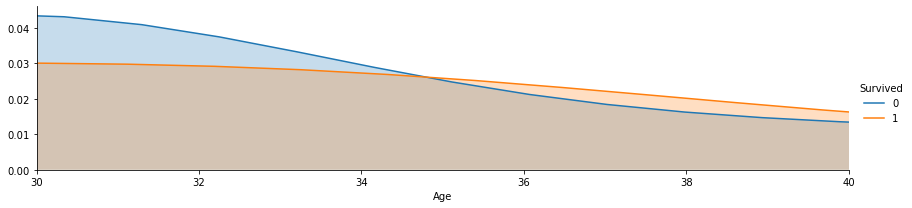

In [278]:
# 연령 범위 확인
min(train['Age'])
max(train['Age']) # 0.42 ~ 80세
# 연령 범위 자르기
facet = sns.FacetGrid(train, hue='Survived',aspect=4) #facetgrid : 다중플랏 그리드를 구성(도화지를 나눔)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.add_legend()
plt.xlim(30,40)

In [279]:
# plotly, tableau 시각화 스터디 (plotly.com)

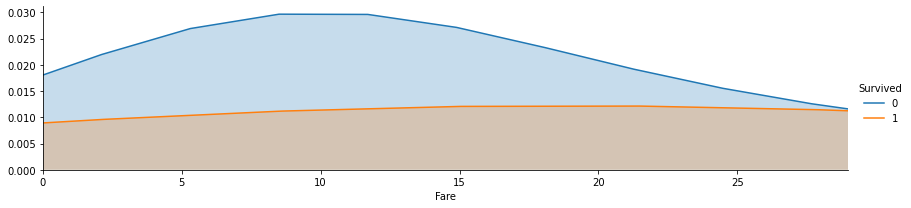

In [280]:
# 시각화 / facetgrid : 다중플랏 그리드를 구성(도화지를 나눔)
facet = sns.FacetGrid(train, hue='Survived',aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0,train['Fare'].max()))
plt.xlim(0,29)
facet.add_legend()

In [281]:
# Fare 범주화
for data in train_test:
    data.loc[data['Fare']<=17,'Fare']=0
    data.loc[(data['Fare']>17)&(data['Fare']<=29),'Fare']=1
    data.loc[(data['Fare']>29)&(data['Fare']<=90),'Fare']=2
    data.loc[data['Fare']>90,'Fare']=3

In [282]:
train['Fare'].value_counts()

0.0    496
2.0    191
1.0    147
3.0     57
Name: Fare, dtype: int64

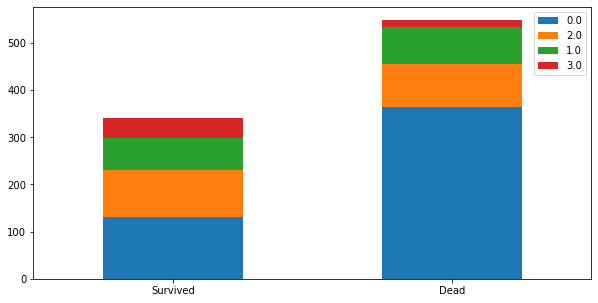

In [283]:
barChart(train,'Fare')

In [284]:
# Cabin 결측값 처리
train.Cabin.value_counts() #객실번호

B96 B98        4
C23 C25 C27    4
G6             4
F2             3
E101           3
              ..
E77            1
F G63          1
B19            1
B30            1
A34            1
Name: Cabin, Length: 147, dtype: int64

In [285]:
train[train.Cabin.notnull()].Cabin.str[0]

1      C
3      C
6      E
10     G
11     C
      ..
871    D
872    B
879    C
887    B
889    C
Name: Cabin, Length: 204, dtype: object

In [286]:
# Cabin 알파벳 앞글자만 가진 열 추가
train['Cabinf'] = train.Cabin.str[0]
test['Cabinf'] = test.Cabin.str[0]

""" 이렇게 한번에 해도 된다
for data in train_test:
    data["Cabinf"] = data.Cabin.str[0]
"""

' 이렇게 한번에 해도 된다\nfor data in train_test:\n    data["Cabinf"] = data.Cabin.str[0]\n'

,C,B,D,E,A,T,F,G
P1_cabin,59.0,47.0,29.0,25.0,15.0,1.0,NaN,NaN
P2_cabin,NaN,NaN,4.0,4.0,NaN,NaN,8.0,NaN
P3_cabin,NaN,NaN,NaN,3.0,NaN,NaN,5.0,4.0


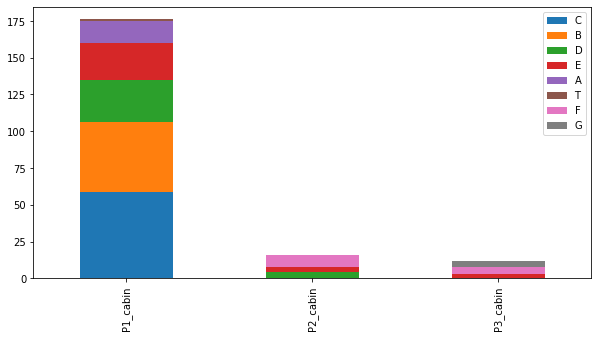

In [287]:
# Pcalss별 Cabin 분포 시각화
P1_cabin = train[train["Pclass"]==1].Cabinf.value_counts()
P2_cabin = train[train["Pclass"]==2].Cabinf.value_counts()
P3_cabin = train[train["Pclass"]==3].Cabinf.value_counts()

P_cabin = pd.DataFrame([P1_cabin,P2_cabin,P3_cabin])
P_cabin.index = (['P1_cabin','P2_cabin','P3_cabin'])
P_cabin.plot(kind='bar', stacked=True, figsize=(10,5))
P_cabin

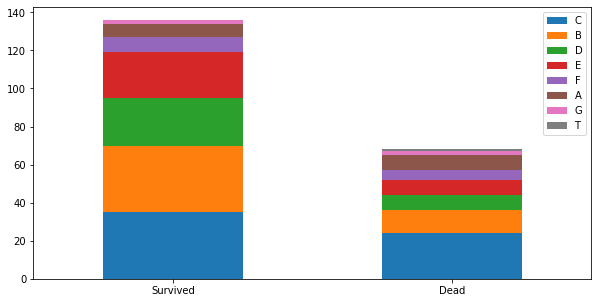

In [288]:
barChart(train,'Cabinf')

In [289]:
tm = {"A":0,"B":1,"C":2,"D":3,"E":4,"F":5,"G":6,"T":7} # T는 알아서 변경해보세요
for data in train_test:
    data['Cabin'] = data['Cabinf'].map(tm)

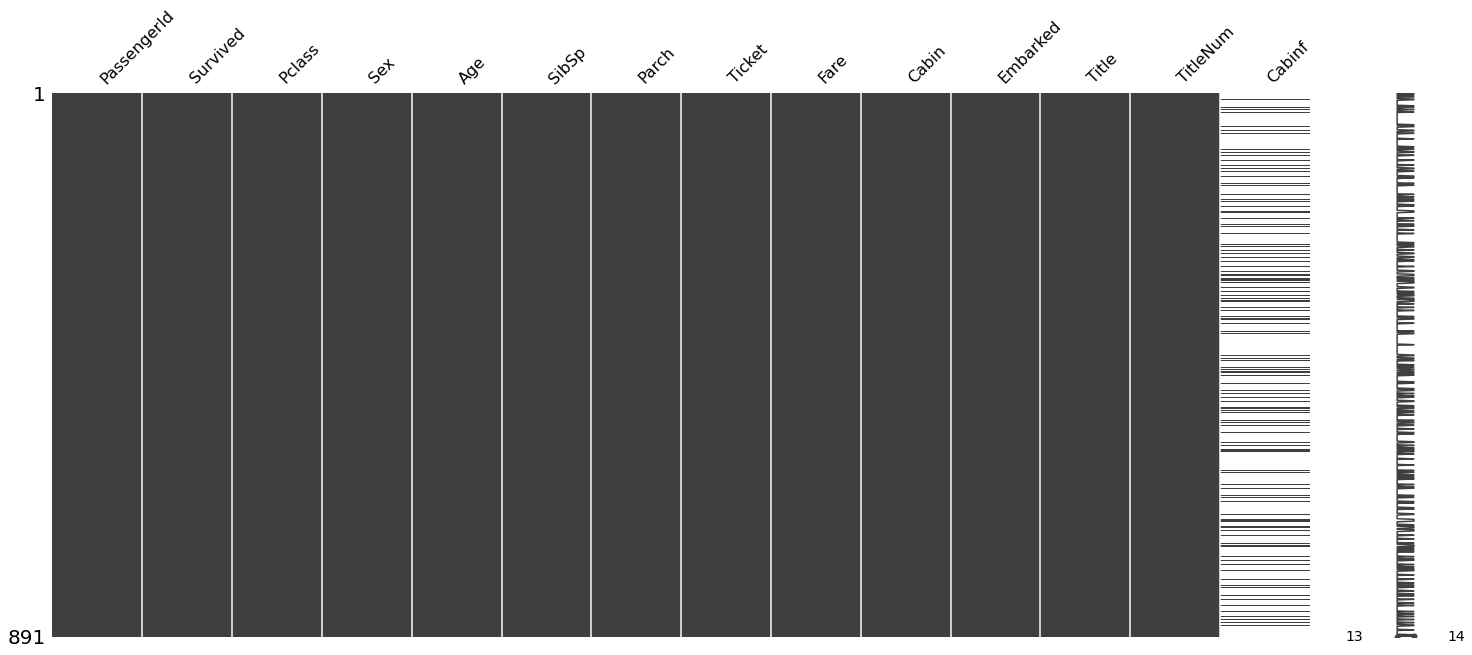

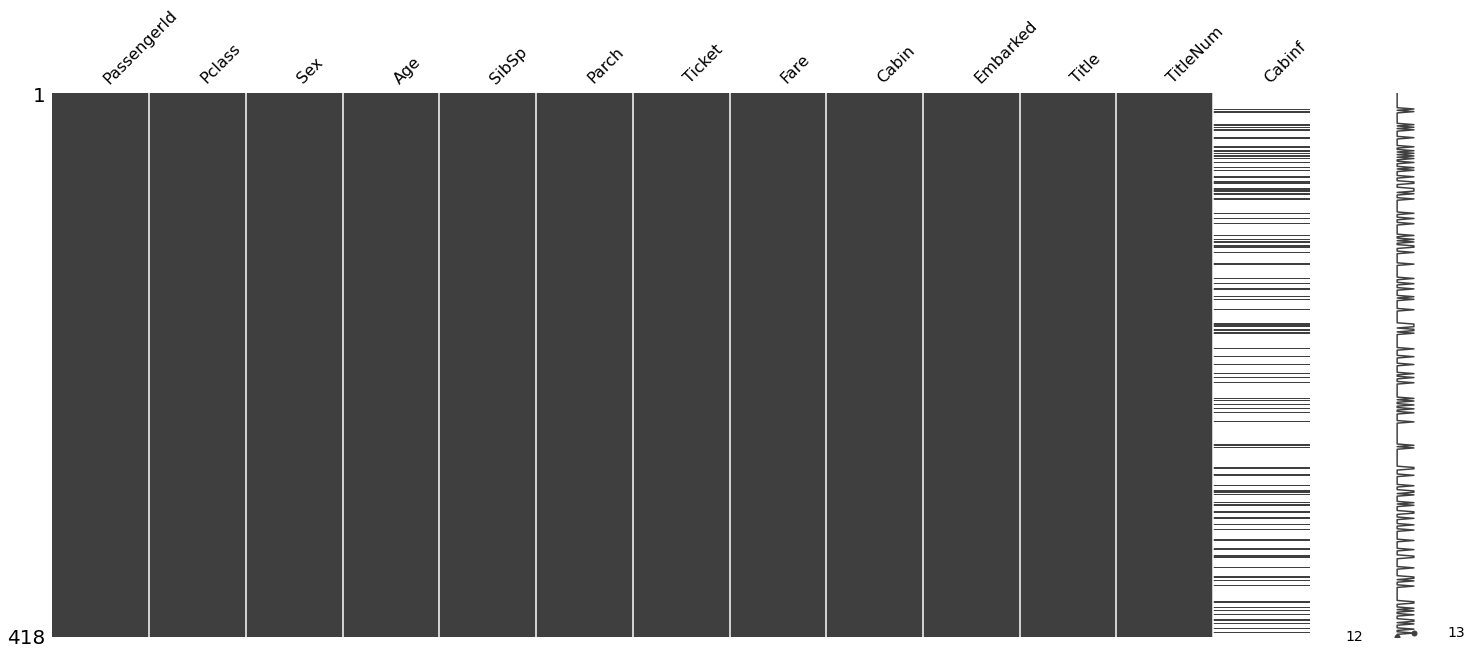

In [290]:
"""
# 호칭 컬럼별 중앙값으로 Age 결측값처리
train['Age'].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test['Age'].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
"""

# pclass별로 그룹화 , 그룹별로 cabin열 중앙값으로 대체 (train & test)
train.Cabin.fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test.Cabin.fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

# 결측치 확인 (흰색이 결측치)
import missingno as msno
msno.matrix(train)
msno.matrix(test)

In [291]:
# Sibsp컬럼과 Parch컬럼을 합쳐서 FamilySize컬럼 만듬
train['FamilySize'] = train['SibSp']+train['Parch']+1
test['FamilySize'] = test['SibSp']+test['Parch']+1

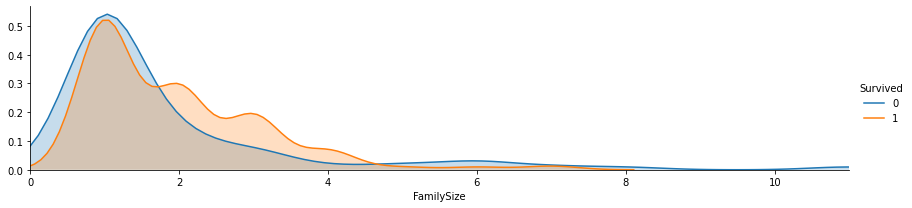

In [292]:
#facetgrid : 다중플랏 그리드를 구성(도화지를 나눔)
facet = sns.FacetGrid(train, hue='Survived',aspect=4)
facet.map(sns.kdeplot,'FamilySize', shade=True)
facet.set(xlim=(0,train['FamilySize'].max()))
facet.add_legend()

In [293]:
type(train['FamilySize'])

pandas.core.series.Series

In [297]:
train['FamilySize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [298]:
# FamilySize 표준화

# from sklearn.preprocessing import StandardScaler 
# train['FamilySize_z'] = StandardScaler().fit_transform(train[['FamilySize']]) #표준화 함수
# test['FamilySize_z'] = StandardScaler().fit_transform(test[['FamilySize']]) #표준화 함수

In [299]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    float64
 10  Embarked     891 non-null    float64
 11  Title        891 non-null    object 
 12  TitleNum     891 non-null    int64  
 13  Cabinf       204 non-null    object 
 14  FamilySize   891 non-null    int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 104.5+ KB


In [264]:
# 필요없는 컬럼 제거
train = train.drop(["PassengerId","Ticket","SibSp","Parch","Cabinf","FamilySize","Title"], axis=1)
test = test.drop(["Ticket","SibSp","Parch","Cabinf","FamilySize","Title"], axis=1)
trainData = train.drop(['Survived'], axis=1)
target = train['Survived']
# trainData -> 모델 -> 예측 == 정답(target)

In [265]:
trainData.info()
#target

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        891 non-null    int64  
 1   Sex           891 non-null    int64  
 2   Age           891 non-null    float64
 3   Fare          891 non-null    float64
 4   Cabin         891 non-null    float64
 5   Embarked      891 non-null    float64
 6   TitleNum      891 non-null    int64  
 7   FamilySize_z  891 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 55.8 KB


In [266]:
#CrossValidation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

In [267]:
# KFold 객체생성
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [268]:
#KNN
clf = KNeighborsClassifier(n_neighbors=12)
score = cross_val_score(clf, trainData, target, cv=kfold,
                n_jobs=1, scoring='accuracy')
np.mean(score)

0.7833707865168539

In [269]:
train['Embarked'].value_counts()

0.0    646
1.0    168
2.0     77
Name: Embarked, dtype: int64

In [270]:
#SVM
clf = SVC()
clf.fit(trainData,target)
#score
score = cross_val_score(clf, trainData, target, cv=kfold,
                n_jobs=1, scoring='accuracy')
np.mean(score)

0.7204993757802747

In [ ]:
testData = test.drop("PassengerId", axis=1).copy()